# CV and CNN
pytorch cv libraries (torch vision)
* torchvision.datasets- get datasets and data loading functions for computer vision here
* torchvision.models-get pretrained computer vision models that you can leverage for your own problems
* torchvision.transform-functions for manipulating your vision data(images) to be suitable for use with a ML model
* torch.utils.data.Dataset-Bata dataset class for Pytorch
* torch.utils.data.DataLoader-creates a python iterable over a dataset

In [1]:
#import PyTorch
import torch
from torch import nn 
#import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

#import matplotlib
import matplotlib.pyplot as plt
print(torchvision.__version__)

0.15.1+cu117


## 1. Getting a dataset
Dataset-fashion mnist

In [2]:
#setup training data

train_data=datasets.FashionMNIST(root="data",#where to download the data to?
                                 train=True,# do you want the training dataset?
                                 download=True,#do you want to download the data
                                 transform=ToTensor(),# how do you want to transform your data
                                 target_transform=None,#how do you want to transfer your target or labels?
                                 )
#set up testing data
test_data=datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [3]:
len(train_data),len(test_data)

(60000, 10000)

In [4]:
image,label=train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
#getting the various class names
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_idx=train_data.class_to_idx
class_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

# Visualizing random images from the dataset

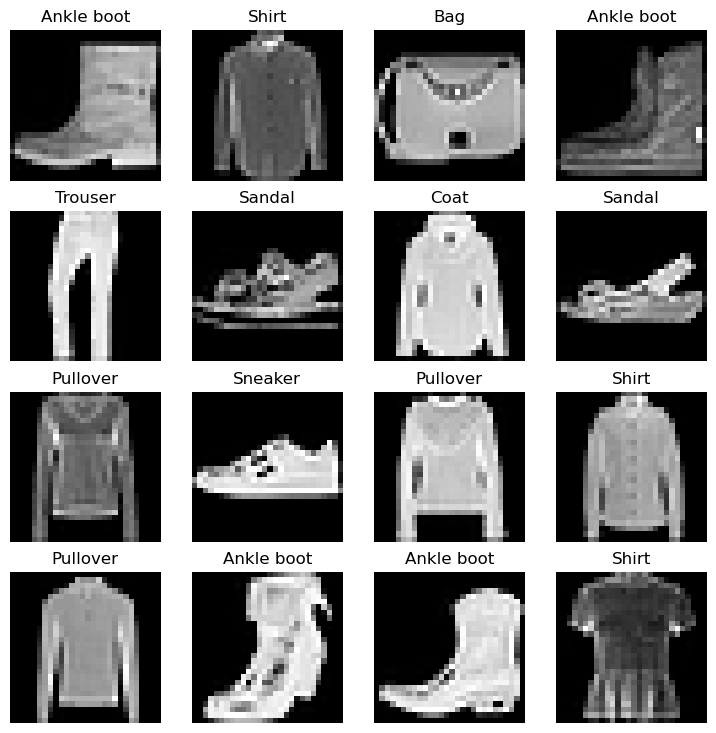

In [7]:
#set the manual seed
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols=4,4

#loop for adding images to the figure
for i in range(1,rows*cols+1):
    random_idx=torch.randint(0,len(train_data),size=[1]).item()
    img,label=train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(),cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

## Prepare DataLoader

DataLoader turns the dataset into a python iterable

Goal is to turn our data into batches or mini-batches

Why?
* It is more computationally efficient
* It gives our neural network more chances to update its gradient per epoch

In [8]:
#import DataLoader
from torch.utils.data import DataLoader
#Setup the batch size hyperparameter

BATCH_SIZE=32

#train_dataloader
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=BATCH_SIZE,
                            shuffle=True)
test_dataloader=DataLoader(dataset=test_data,
                           batch_size=BATCH_SIZE,
                           shuffle=False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x2d785605690>,
 <torch.utils.data.dataloader.DataLoader at 0x2d7f6a1d900>)

In [9]:
# check out what is iniside the training dataloader
train_features_batch,train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size:torch.Size([1, 28, 28])
Image Label:6


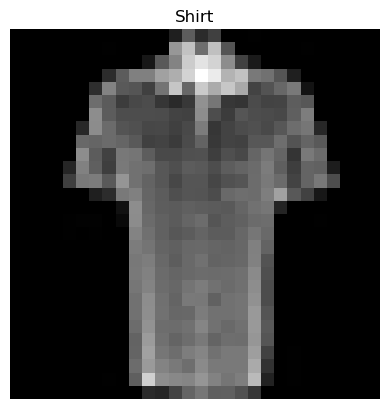

In [10]:
# show a sample 
torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img,label=train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size:{img.shape}")
print(f"Image Label:{label}")

# Building a base line model
A baseline model is a simple model you will try to improve upon with other models.
Basically start simply and increase the complexity to improve performance


In [11]:
#create a flat layer
flatten_model=nn.Flatten()

#get a single sample
x=train_features_batch[0]

#flatten the sample
output=flatten_model(x)

print(f"shape before flatten:{x.shape},shape after flatten:{output.shape}") # shape after flatten becomes[color_channels,height*width]

shape before flatten:torch.Size([1, 28, 28]),shape after flatten:torch.Size([1, 784])


## Model :Baseline Model

In [12]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape:int,
                 hidden_units:int,
                 output_shape:int):
        super().__init__()
        self.layer_stack=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,out_features=hidden_units),
            nn.Linear(in_features=hidden_units,out_features=output_shape)
        )

    def forward(self,x):
        return self.layer_stack(x)    

In [13]:
torch.manual_seed(42)

#setup model with parameters
model_0=FashionMNISTModelV0(input_shape=784 # this is 28*28
                            ,hidden_units=10,
                            output_shape=len(class_names))#one for every class
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

### set up, loss, optimizer and evaluation metrics

* loss function- `nn.CrossEntropyLoss()`
* Optimizer-`SGD`
* Evaluation metric-`accuracy` 

In [14]:
#loss function
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.1)


In [15]:
#how fast our model runs
from timeit import default_timer as timer

def print_train_time(start:float,end:float,device:torch.device):
    """Prints difference between start and end time"""
    total_time=end-start
    print(f'Train time on {device}:{total_time}')


## Creating a training loop and training the model on batches of data
1. Loop through epochs
2. Loop through batches ,perform training steps, calculate the train loss per batch
3. Loop through testing batches ,perform training steps,calculate the test loss per batch
4. Print out what is happening
5. Time it all

In [16]:
#import tqdm for progress bar
from tqdm.auto import tqdm

# set the seed and start the timer
torch.manual_seed(42)
train_time_start=timer()

#set the number of epochs
epochs=4

for epoch in tqdm(range(epochs)):
    print(f"Epoch:{epoch}\n.....")

    ### training
    train_loss=0

    #loop through the training looop
    for batch,(X,y) in enumerate(train_dataloader):
        model_0.train()
        #Forward pass
        y_pred=model_0(X)

        #calculate the loss per barch
        loss=loss_fn(y_pred,y)
        train_loss +=loss

        #optimizer zero grad
        optimizer.zero_grad()

        #back propagation
        loss.backward()
        
        #optimizer step
        optimizer.step()

        #visualize the progress in every 400 batches
        if batch%400==0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)}samples")
    
    #Divide total loss by length of train_data_loader
    train_loss /=len(train_dataloader)


    ###Testing Loop###

    test_loss=0
    model_0.eval()

    with torch.inference_mode():
        for X_test,y_test in test_dataloader:
            #Forward pass
            test_pred=model_0(X_test)
            #calculate the loss
            test_loss+=loss_fn(test_pred,y_test)

        #calculate test loss average per batch
        test_loss /=len(test_dataloader)   


    #visualize what is happening
    print(f'\n Train Loss:{train_loss:.4f},test loss:{test_loss:.4f}')     
# end train time
train_time_end=timer()

total_train_time_model_0=train_time_end-train_time_start

print(f'Total train time for model0 is :{total_train_time_model_0:.2f}secs')










  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:0
.....
Looked at 0/60000samples
Looked at 12800/60000samples
Looked at 25600/60000samples
Looked at 38400/60000samples
Looked at 51200/60000samples

 Train Loss:0.5904,test loss:0.5095
Epoch:1
.....
Looked at 0/60000samples
Looked at 12800/60000samples
Looked at 25600/60000samples
Looked at 38400/60000samples
Looked at 51200/60000samples

 Train Loss:0.4763,test loss:0.4799
Epoch:2
.....
Looked at 0/60000samples
Looked at 12800/60000samples
Looked at 25600/60000samples
Looked at 38400/60000samples
Looked at 51200/60000samples

 Train Loss:0.4550,test loss:0.4766
Epoch:3
.....
Looked at 0/60000samples
Looked at 12800/60000samples
Looked at 25600/60000samples
Looked at 38400/60000samples
Looked at 51200/60000samples

 Train Loss:0.4425,test loss:0.4631
Total train time for model0 is :42.55secs


## Model evaluation function


In [17]:
from helper_functions import accuracy_fn
torch.manual_seed(42)

def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the model prediction results on 
    data_loader"""

    loss,acc=0,0
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            #make predictions
            y_pred=model(X)

            #accumulate the loss and accuracy per batch
            loss +=loss_fn(y_pred,y)
            acc +=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
            
        #average loss and accuracy per batch
        loss /=len(data_loader)
        acc/=len(data_loader)    

    return{"model_name":model.__class__.__name__,#only works if model was created with a class
          "model_loss":loss.item(),
          "model_accuracy":acc
          
          }     



In [39]:
model_0_results=eval_model(model=model_0,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn)
model_2_results=eval_model(model=model_2,
                           loss_fn=loss_fn,
                           data_loader=test_dataloader,
                           accuracy_fn=accuracy_fn)
model_0_results,model_2_results

({'model_name': 'FashionMNISTModelV0',
  'model_loss': 0.4630562663078308,
  'model_accuracy': 83.74600638977635},
 {'model_name': 'FashionMNISTModelV2',
  'model_loss': 0.35832133889198303,
  'model_accuracy': 87.44009584664536})

## second model with non linear features

In [19]:
# create model with  non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape:int,
                 hidden_units:int,
                 output_shape:int):
        super().__init__()
        self.layer_stack=nn.Sequential(
            nn.Flatten(),# flatten inputs into a single vector
            nn.Linear(in_features=input_shape,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=output_shape),
            nn.ReLU()

        )
    #overwrite forward method
    def forward(self,x:torch.Tensor):
        return self.layer_stack(x)

In [20]:
# create an instance of the model_1
torch.manual_seed(42)
model_1=FashionMNISTModelV1(input_shape=784,#output of the flatten layer
                            hidden_units=10,
                            output_shape=len(class_names)
                            )

model_1                       

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

## training loop and testing loop for model1
maintaining the same loss function and optimizer

In [21]:
from helper_functions import accuracy_fn
loss_fn=nn.CrossEntropyLoss() 
optimizer=torch.optim.SGD(params=model_1.parameters(),
                          lr=0.2)



## building a function for training(train_step) and testing loop(test_step) 

In [22]:
def train_step(model:nn.Module,
               
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn):
    """Performs a traininig step on model trying to learn on data_loader"""
    model.train()
    tloss,tacc=0,0

    #go through every batch and get the corresponding loss
    for batch,(X,y) in enumerate(dataloader):
            #model forward pass
            y_pred=model(X)
            #calculate the loss
            loss=loss_fn(y_pred,y)
            tacc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
            tloss+=loss

            #optimzer zerograd
            optimizer.zero_grad()

            #loss backward
            loss.backward()

            #optimizer step
            optimizer.step()

    #calculate average loss and accuracy per batch
    tloss/=len(dataloader)
    tacc/=len(dataloader)   
    print(f"Train Loss:{tloss:.5f}|Train Accuracy:{tacc:.2f}%") 

In [23]:
def test_step(model:torch.nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn):
    """Perfoms a testing loop step on model going over data loader"""
    test_loss,test_acc=0,0
    model.eval()
    #turn on inference mode context manager
    with torch.inference_mode():
        for X,y in dataloader:
            #forward pass
            y_pred=model(X)
            #calculate loss and accuracy
            loss=loss_fn(y_pred,y)
            test_loss+=loss
            test_acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

        #calculate average loss and accuracy per batch
        test_loss/=len(dataloader)
        test_acc/=len(dataloader)    

    print(f"Test Loss:{test_loss:.5f}|Test Accuracy:{test_acc:.2f}%")    



## Creating a training and testing loop making use of the functions train_step() and test_step()

In [24]:
#manual seed


epochs=4

for epoch in tqdm(range(epochs)):
    print(f"Epoch:{epoch}\n")
    #train step
    train_step(model=model_1,
               dataloader=train_dataloader
               ,loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn)
    #testing step
    test_step(model=model_1,
              dataloader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn)

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:0

Train Loss:1.05086|Train Accuracy:61.47%
Test Loss:0.97068|Test Accuracy:64.04%
Epoch:1

Train Loss:0.73669|Train Accuracy:73.49%
Test Loss:0.50025|Test Accuracy:82.91%
Epoch:2

Train Loss:0.50060|Train Accuracy:82.67%
Test Loss:0.61061|Test Accuracy:79.87%
Epoch:3

Train Loss:0.47885|Train Accuracy:83.34%
Test Loss:0.55967|Test Accuracy:80.90%


In [37]:
model_1_results=eval_model(model=model_1,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn)
model_1_results,model_0_results

({'model_name': 'FashionMNISTModelV1',
  'model_loss': 0.5596671104431152,
  'model_accuracy': 80.90055910543131},
 {'model_name': 'FashionMNISTModelV0',
  'model_loss': 0.4630562663078308,
  'model_accuracy': 83.74600638977635})

# CNN
Most popular for their capabilities to find patterns in visual data

* Architecture of a cnn
1. Input layer
2. Convolution layer
3. Hidden activation/non-linear activation layer
4. Pooling layer
5. Output layer/linear layer
6. Output activation

In [26]:
#create a convolutional neural network 

class FashionMNISTModelV2(nn.Module):
    """a cnn approach to aim to improve our results"""

    def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
        super().__init__()
        self.conv_block_1=nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)

        )

        self.conv_block_2=nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )    

        self.classifier=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self,x):
        x=self.conv_block_1(x)
        #print(x.shape)
        x=self.conv_block_2(x)
        #print(x.shape)
        x=self.classifier(x)

        return x
        



In [27]:
image.shape

torch.Size([1, 28, 28])

#optimizer for v2 

### optimizer for model_2

In [31]:
torch.manual_seed
model_2=FashionMNISTModelV2(input_shape=1,
                            hidden_units=10,
                            output_shape=len(class_names))
optimizer=torch.optim.SGD(params=model_2.parameters(),
                          lr=0.2)

# Training and testing modelv2

In [32]:
#training and testing loop for cnn
torch.manual_seed(42)
epochs=3

for epoch in tqdm(range(epochs)):
    print(f"Epoch:{epoch}\n")
    train_step(model=model_2,
               dataloader=train_dataloader,
               loss_fn=loss_fn,
               accuracy_fn=accuracy_fn,
               optimizer=optimizer)
    test_step(model=model_2,
              dataloader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn)




  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0

Train Loss:0.59309|Train Accuracy:78.51%
Test Loss:0.39270|Test Accuracy:86.01%
Epoch:1

Train Loss:0.37275|Train Accuracy:86.48%
Test Loss:0.36218|Test Accuracy:86.56%
Epoch:2

Train Loss:0.34751|Train Accuracy:87.33%
Test Loss:0.35832|Test Accuracy:87.44%


In [34]:
model_0_results,model_1_results

({'model_name': 'FashionMNISTModelV0',
  'model_loss': 0.4630562663078308,
  'model_accuracy': 83.74600638977635},
 {'model_name': 'FashionMNISTModelV1',
  'model_loss': 0.5596671104431152,
  'model_accuracy': 80.90055910543131})

In [44]:
model2_results=eval_model(model=model_2,
                         data_loader=test_dataloader,
                         loss_fn=loss_fn,
                         accuracy_fn=accuracy_fn)
model2_results,model_0_results,model_1_results

({'model_name': 'FashionMNISTModelV2',
  'model_loss': 0.35832133889198303,
  'model_accuracy': 87.44009584664536},
 {'model_name': 'FashionMNISTModelV0',
  'model_loss': 0.4630562663078308,
  'model_accuracy': 83.74600638977635},
 {'model_name': 'FashionMNISTModelV1',
  'model_loss': 0.5596671104431152,
  'model_accuracy': 80.90055910543131})

# Compare the results

In [45]:
import pandas as pd

compare_results=pd.DataFrame([model_0_results,
                              model_1_results,
                              model_2_results])
compare_results

,model_name,model_loss,model_accuracy
0,FashionMNISTModelV0,0.463056,83.746006
1,FashionMNISTModelV1,0.559667,80.900559
2,FashionMNISTModelV2,0.358321,87.440096


# Visualize the model results


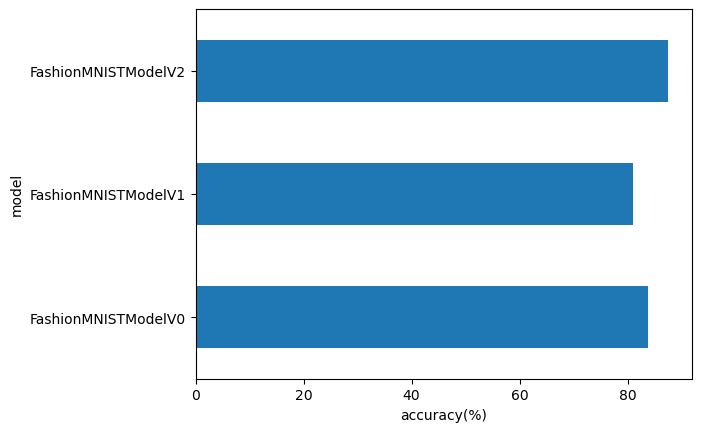

In [46]:
compare_results.set_index("model_name")["model_accuracy"].plot(kind="barh")
plt.xlabel("accuracy(%)")
plt.ylabel("model");